# Student Name: Huynh Truong Tu
 Below is my assignment for Sprint23's "Gated Recurrent Neural Network"

------------------------------------------------------------------------------

## Problem 1

- LSTM

In [1]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
17473536/17464789 [==============================] - 3s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 904s 1s/step - loss: 0.4281 - accuracy: 0.7992 - val_loss: 0.3800 - val_accuracy: 0.8336
Epoch 2/5
782/782 [==============================] - 899s 1s/step - loss: 0.2559 - accuracy: 0.8988 - val_loss: 0.4539 - val_accuracy: 0.8216
Epoch 3/5
782/782 [==============================] - 889s 1s/step - loss: 0.1640 - accuracy: 0.9365 - val_loss: 0.4931 - val_accuracy: 0.8245
Epoch 4/5
782/782 [==============================] - 913s 1s/step - loss: 0.1048 - accuracy: 0.9620 - val_loss: 0.5840 - val_accuracy: 0.8162
Epoch 5/5
782/782 [==============================] - 48s 61ms/step - loss: 0.5745 - accuracy: 0.8202
Test score: 0.5745218992233276
Test accuracy: 0.8202400207519531


- ConvLSTM2D

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_11696/1302028885.py:46: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
C:\Users\ADMIN\AppData\Local\Temp/ipykernel_11696/1302028885.py:48: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.float)


Epoch 1/2
95/95 [==============================] - 128s 1s/step - loss: 0.9425 - val_loss: 0.6966
Epoch 2/2
95/95 [==============================] - 119s 1s/step - loss: 0.8244 - val_loss: 0.7423


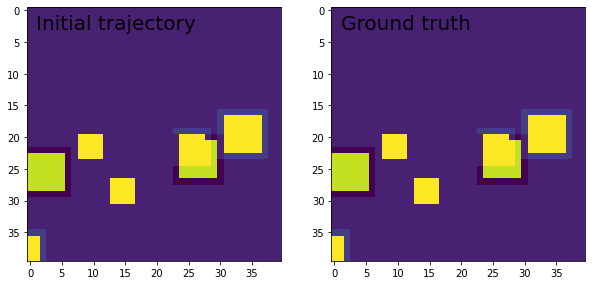

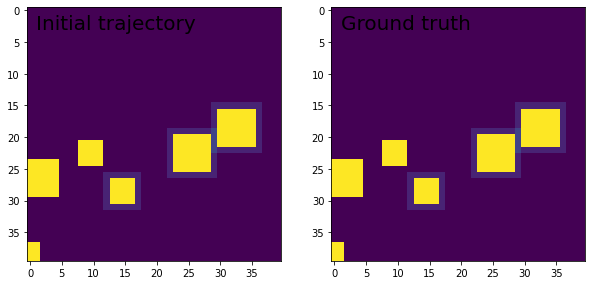

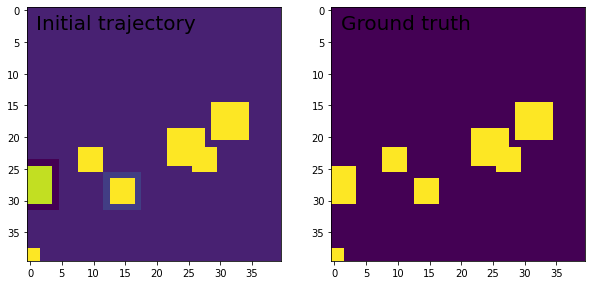

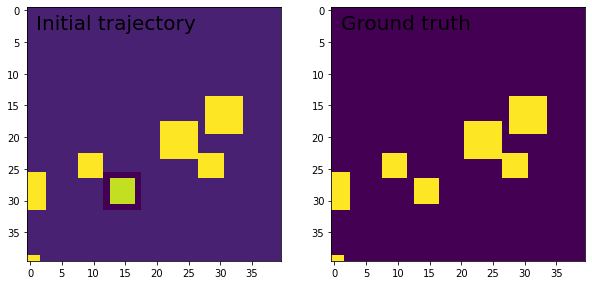

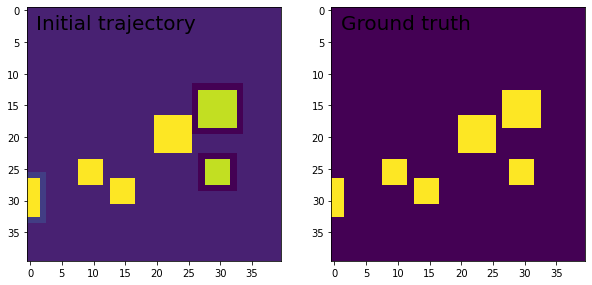

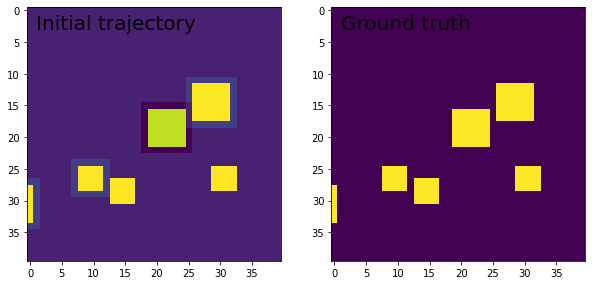

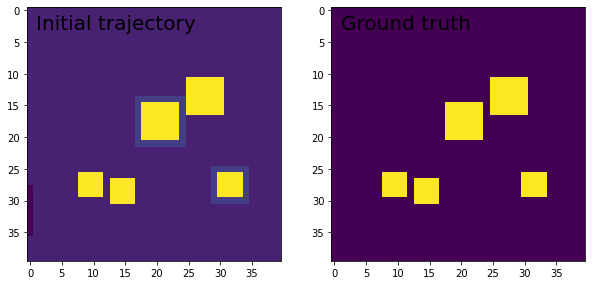

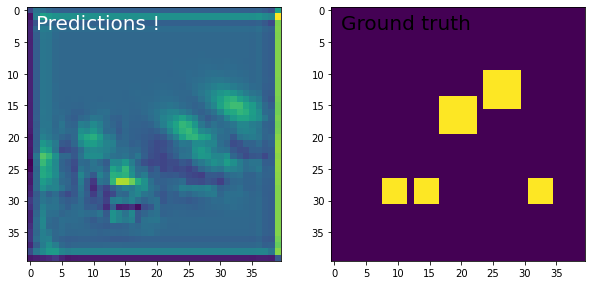

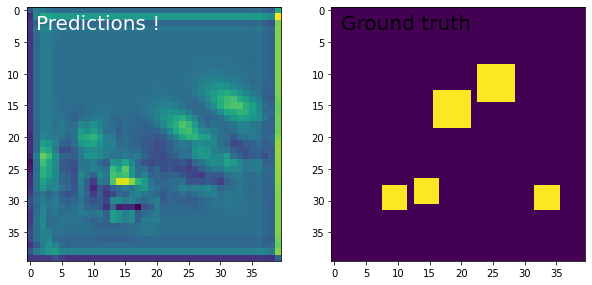

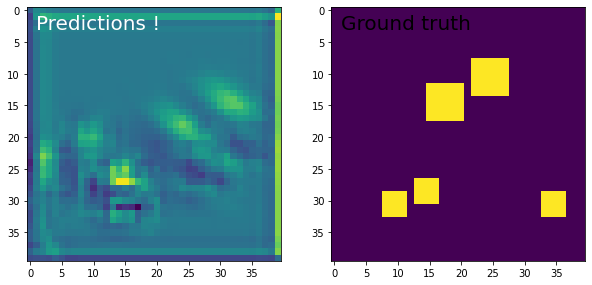

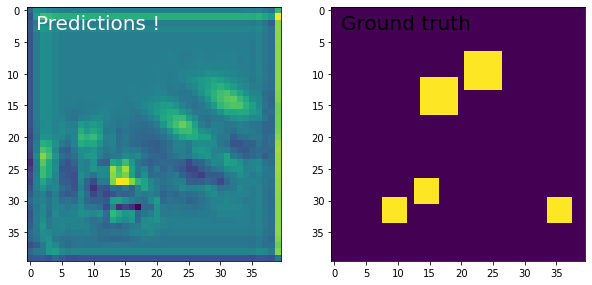

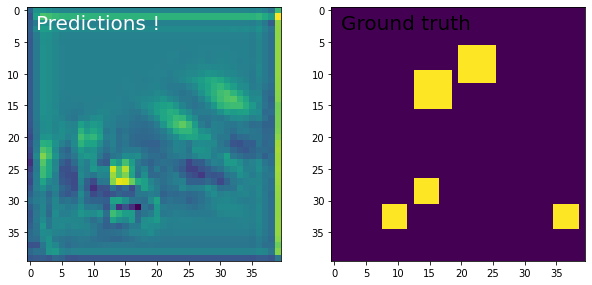

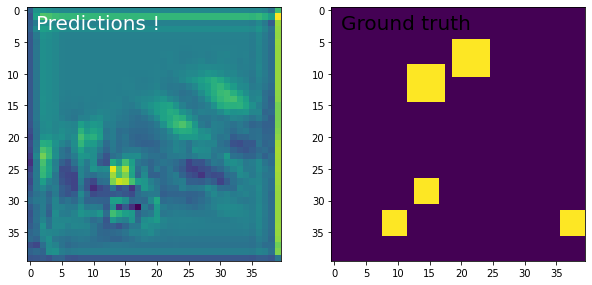

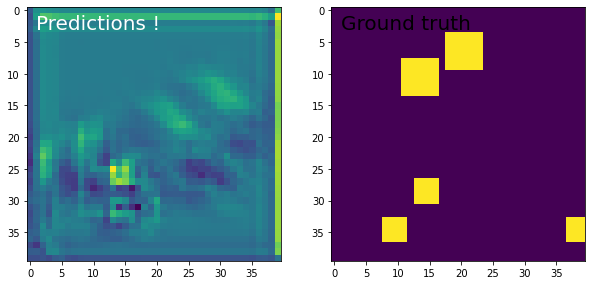

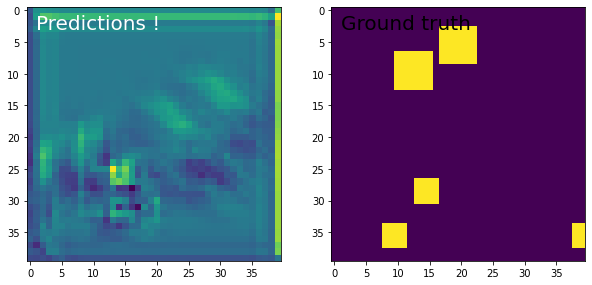

In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
import pylab as plt
import numpy as np

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=2, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

- SimpleRNN

In [5]:
from keras.layers.recurrent import SimpleRNN
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/5
782/782 [==============================] - 281s 359ms/step - loss: 0.6757 - accuracy: 0.5601 - val_loss: 0.5547 - val_accuracy: 0.7203
Epoch 2/5
782/782 [==============================] - 284s 363ms/step - loss: 0.5558 - accuracy: 0.7042 - val_loss: 0.6312 - val_accuracy: 0.6340
Epoch 3/5
782/782 [==============================] - 289s 370ms/step - loss: 0.5053 - accuracy: 0.7499 - val_loss: 0.5160 - val_accuracy: 0.7476
Epoch 4/5
782/782 [==============================] - 276s 353ms/step - loss: 0.4696 - accuracy: 0.7823 - val_loss: 0.6025 - val_accuracy: 0.6691
Epoch 5/5
782/782 [==============================] - 10s 13ms/step - loss: 0.5101 - accuracy: 0.7544
Test score: 0.5101104378700256
Test accuracy: 0.754360020160675


- GRU

## Problem 2

- Let's use another dataset'

In [2]:
from keras.layers.recurrent import GRU
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Epoch 1/2
782/782 [==============================] - 1070s 1s/step - loss: 0.4465 - accuracy: 0.7851 - val_loss: 0.3729 - val_accuracy: 0.8343
Epoch 2/2
782/782 [==============================] - 51s 65ms/step - loss: 0.3767 - accuracy: 0.8388
Test score: 0.37670448422431946
Test accuracy: 0.8387600183486938


In [4]:
from keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 100
batch_size = 32

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_train.shape[1]

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

2121728/2110848 [==============================] - 1s 0us/step
Pad sequences (samples x time)
x_train shape: (8982, 100)
x_test shape: (2246, 100)
Build model...
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 46)                5934      
                                                                 
Total params: 2,697,518
Trainable params: 2,697,518
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/2
281/281 [==============================] - 412s 1s/step - loss: 0.1031 - accuracy: 0.3192 - val_loss: 0.0722 - val_accuracy: 0.

## Problem 3

**RNN**
- A recurrent neural network (RNN) is a type of artificial neural network in which nodes are connected in a directed graph that follows a temporal sequence. It's a recurrent layer's basic class.
    
**SimpleRNNCell**
- It's the SimpleRNN Cell class. The cell is the same recursively appearing network structure.
    
**GRUCell**
- GRU is an LSTM-simplifying recursive unit with a gate. An "update gate" is a unit of a hidden layer that serves as a cell for the GRU layer and combines an input gate and a forgetting gate into one gate. As a result, the GRUCell class is essentially the Cell class for the GRU layer.
    
**LSTMCell**
- LSTMCell is an object (which also happens to be a layer) utilized by the LSTM layer that includes the computation logic for one step, as LSTM is a recurring layer. It's basically the LSTM layer's Cell class.
    
**StackedRNNCells**
- It's a wrapper that makes the RNN cell stack behave like a single cell. It's utilized to make a stacked RNN that's efficient.
    
**CuDNNGRU**
- It's a CuDNN-based high-speed GRU implementation.

**CuDNNLSTM**
- It's a CuDNN-based high-speed LSTM implementation. CuDNNGRU and CuDNNLSTM are both GPU-based models with a TensorFlow backend.

----------------------------------------------------------------------------------

This is the end of my assignment. Thank you for reading!

Most of it are from instructors' help, thank you very much. This assignement take really long to train and validate on my local machine. 